# 3.2 観測されたデータの概要を調べる

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('./data3a.csv')

In [4]:
df.head()

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C


In [6]:
df.y

0      6
1      6
2      6
3     12
4     10
5      4
6      9
7      9
8      9
9     11
10     6
11    10
12     6
13    10
14    11
15     8
16     3
17     8
18     5
19     5
20     4
21    11
22     5
23    10
24     6
25     6
26     7
27     9
28     3
29    10
      ..
70    10
71     8
72     8
73     7
74     5
75     6
76     8
77     9
78     9
79     6
80     7
81    10
82     6
83    11
84    11
85    11
86     5
87     6
88     4
89     5
90     6
91     5
92     8
93     5
94     9
95     8
96     6
97     8
98     7
99     9
Name: y, dtype: int64

In [7]:
df.x

0      8.31
1      9.44
2      9.50
3      9.07
4     10.16
5      8.32
6     10.61
7     10.06
8      9.93
9     10.43
10    10.36
11    10.15
12    10.92
13     8.85
14     9.42
15    11.11
16     8.02
17    11.93
18     8.55
19     7.19
20     9.83
21    10.79
22     8.89
23    10.09
24    11.63
25    10.21
26     9.45
27    10.44
28     9.44
29    10.48
      ...  
70    10.54
71    11.30
72    12.40
73    10.18
74     9.53
75    10.24
76    11.76
77     9.52
78    10.40
79     9.96
80    10.30
81    11.54
82     9.42
83    11.28
84     9.73
85    10.78
86    10.21
87    10.51
88    10.73
89     8.85
90    11.20
91     9.86
92    11.54
93    10.03
94    11.88
95     9.15
96     8.52
97    10.24
98    10.86
99     9.97
Name: x, dtype: float64

In [8]:
df.f

0     C
1     C
2     C
3     C
4     C
5     C
6     C
7     C
8     C
9     C
10    C
11    C
12    C
13    C
14    C
15    C
16    C
17    C
18    C
19    C
20    C
21    C
22    C
23    C
24    C
25    C
26    C
27    C
28    C
29    C
     ..
70    T
71    T
72    T
73    T
74    T
75    T
76    T
77    T
78    T
79    T
80    T
81    T
82    T
83    T
84    T
85    T
86    T
87    T
88    T
89    T
90    T
91    T
92    T
93    T
94    T
95    T
96    T
97    T
98    T
99    T
Name: f, dtype: object

In [9]:
df.describe()

,y,x
count,100.000000,100.000000
mean,7.830000,10.089100
std,2.624881,1.008049
min,2.000000,7.190000
25%,6.000000,9.427500
50%,8.000000,10.155000
75%,10.000000,10.685000
max,15.000000,12.400000


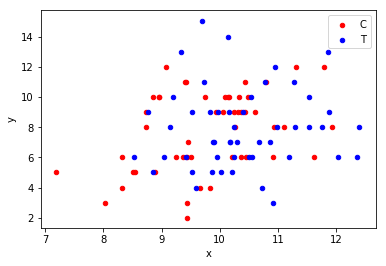

In [26]:
fig, ax = plt.subplots()
df[df['f'] == 'C'] .plot(kind='scatter', x='x', y='y', color='red', ax=ax, label='C')
df[df['f'] == 'T'] .plot(kind='scatter', x='x', y='y', color='blue', ax=ax, label='T')

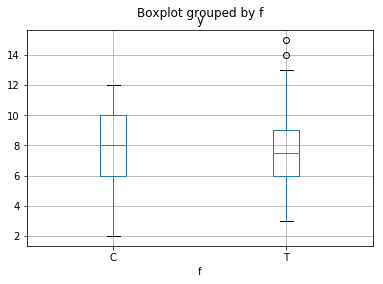

In [97]:
# なんかめっちゃ時間かかったけどこれが正解っぽい？
df.boxplot(column='y', by='f')